Dataset Overview


The dataset contains information about students' demographics, academic performance, lifestyle habits, and mental health indicators. The primary goal is to predict depression scores based on these features.

Key Features

Demographics : Gender, Age, Profession, City

Academic Metrics : Academic Pressure, Work Pressure, CGPA, Study Satisfaction,

Job Satisfaction

Lifestyle Factors :
 Sleep Duration, Dietary Habits, Work/Study Hours, Financial Stress

Mental Health Indicators :
Suicidal Thoughts, Family History of Mental Illness, Degree Pursued

Target Variable
Depression Score :
A numerical value representing the level of depression experienced by the student.

Sample Observations

Each row represents a student with attributes like gender, age, profession, academic pressure, sleep duration, dietary habits, etc.

For example:

A 20-year-old male student from Surat with high academic pressure, healthy dietary habits, and 7 hours of study satisfaction has a depression score of 1.
A 34-year-old female student from Hyderabad with moderate academic pressure, unhealthy dietary habits, and 11 hours of study satisfaction has a depression score of 0.

Purpose

The dataset is intended for predictive modeling, where machine learning algorithms can be trained to predict depression scores based on the provided features.


Import necessary libraries

In [ ]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from joblib import dump, load

In [ ]:

# Load the dataset
data = pd.read_csv("student_depression_dataset.csv")

# Replace "?" with NaN and drop rows with missing values
data = data.replace("?", np.nan).dropna()

# Drop the 'id' and 'City' columns explicitly
data = data.drop(columns=["id", "City"], axis=1)

Encode categorical variables

In [ ]:

# Encode categorical variables
le = LabelEncoder()
categorical_cols = [
    "Gender", "Profession", "Sleep Duration", "Dietary Habits", "Degree",
    "Have you ever had suicidal thoughts ?", "Family History of Mental Illness"
]

for col in categorical_cols:
    if col in data.columns:  # Ensure column exists
        data[col] = le.fit_transform(data[col].astype(str))

Identify numerical columns

In [ ]:

# Identify numerical columns
numerical_cols = [
    "Age", "Academic Pressure", "Work Pressure", "CGPA", "Study Satisfaction",
    "Job Satisfaction", "Work/Study Hours", "Financial Stress"
]


In [ ]:
# Scale numerical features
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])


In [ ]:
# Define features (X) and target (y)
X = data.drop(columns=["Depression"])  # Exclude target variable
y = data["Depression"]

Exploratory Data Analysis (EDA)

*   List item
*   List item



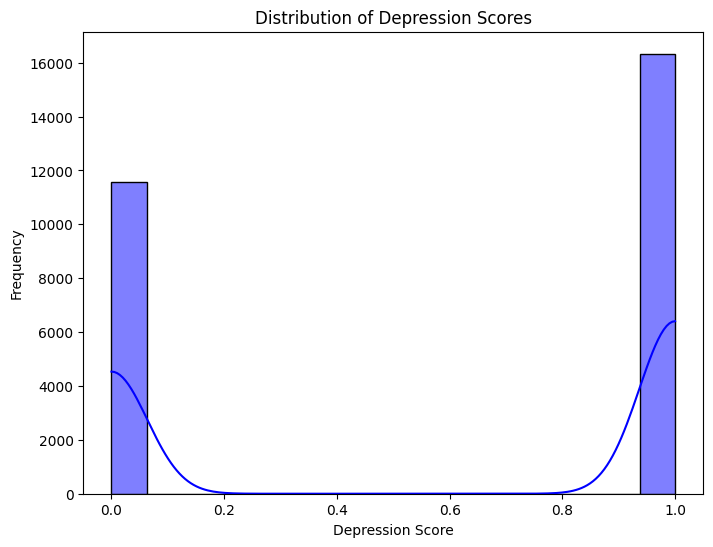

In [ ]:
#Distribution of the Target Variable (`Depression`)
plt.figure(figsize=(8, 6))
sns.histplot(y, kde=True, color="blue")
plt.title("Distribution of Depression Scores")
plt.xlabel("Depression Score")
plt.ylabel("Frequency")
plt.show()

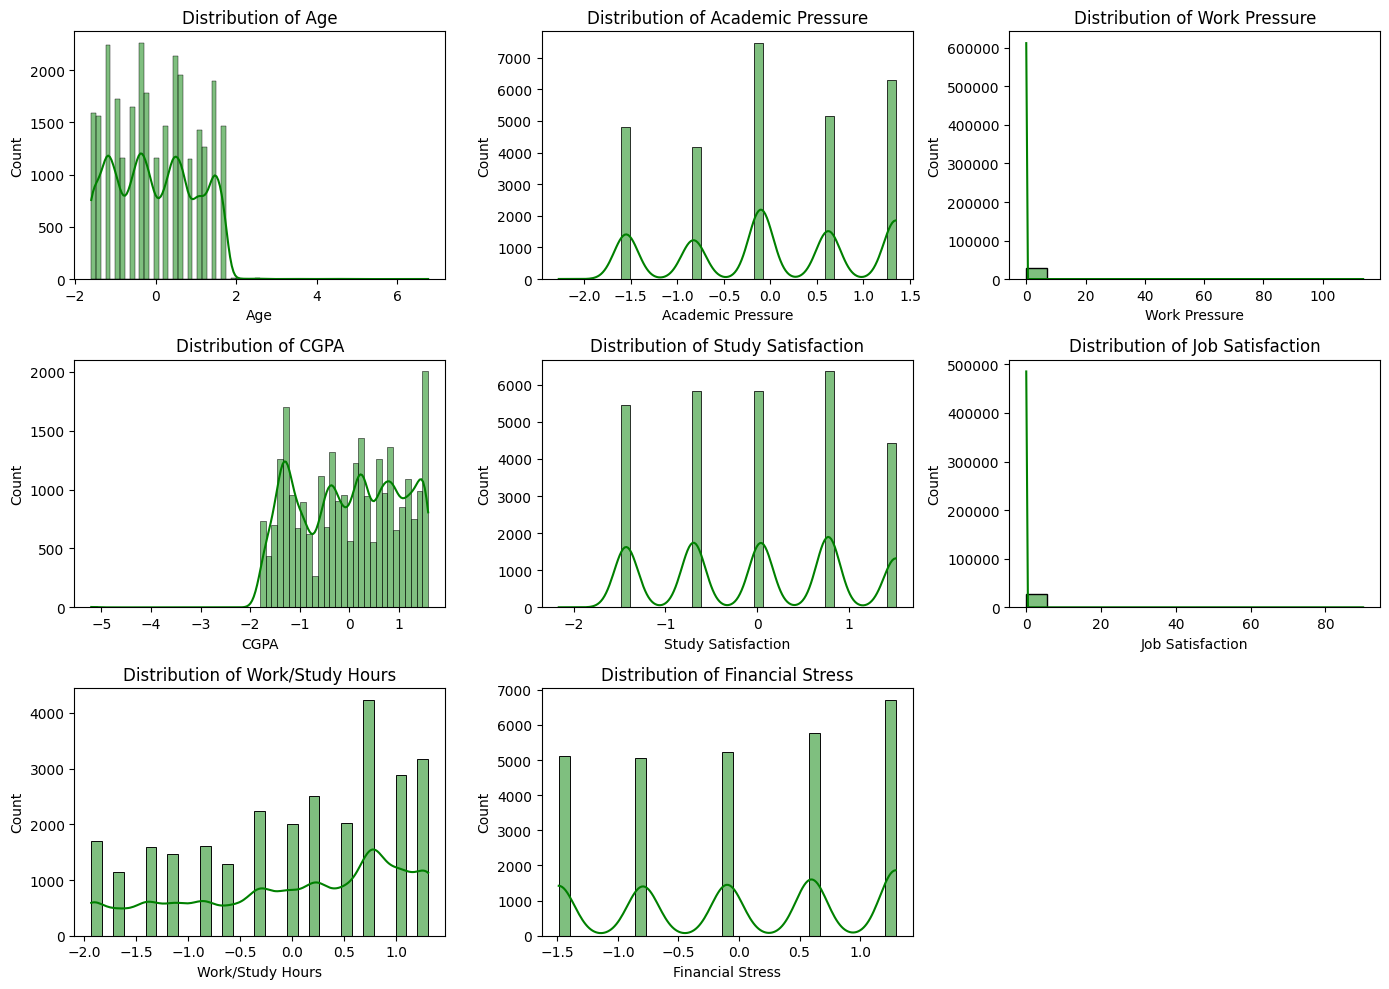

In [ ]:
# 2. Distribution of Numerical Features
plt.figure(figsize=(14, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[col], kde=True, color="green")
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()


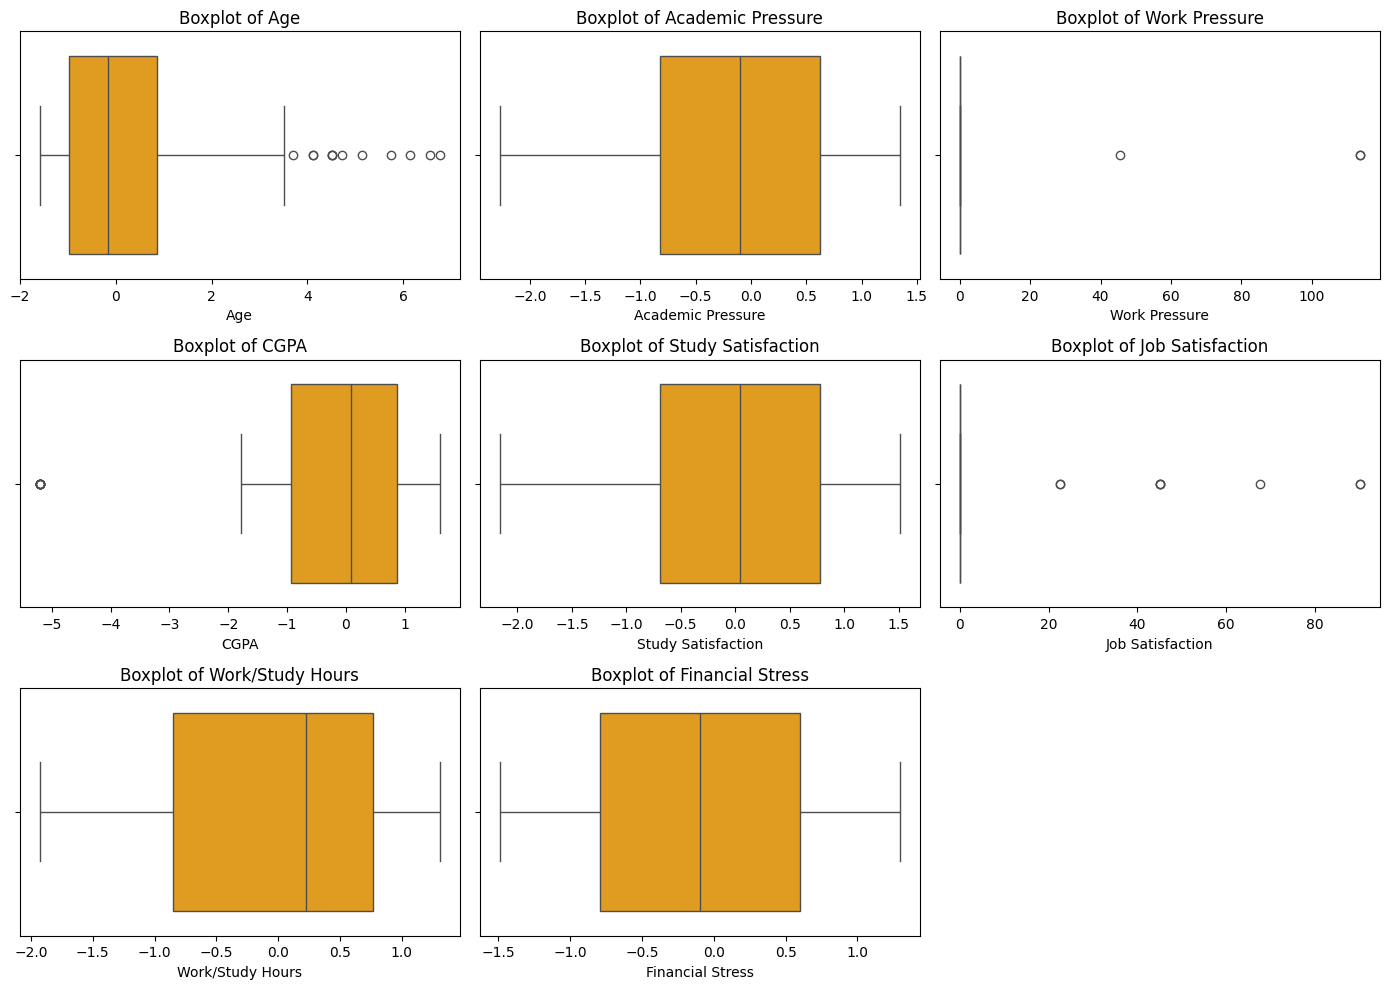

In [ ]:

# 3. Boxplots for Numerical Features
plt.figure(figsize=(14, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=data[col], color="orange")
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()


<ipython-input-12-bc3c4a68b92f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette="viridis")
<ipython-input-12-bc3c4a68b92f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette="viridis")
<ipython-input-12-bc3c4a68b92f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette="viridis")
<ipython-input-12-bc3c4a68b92f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for th

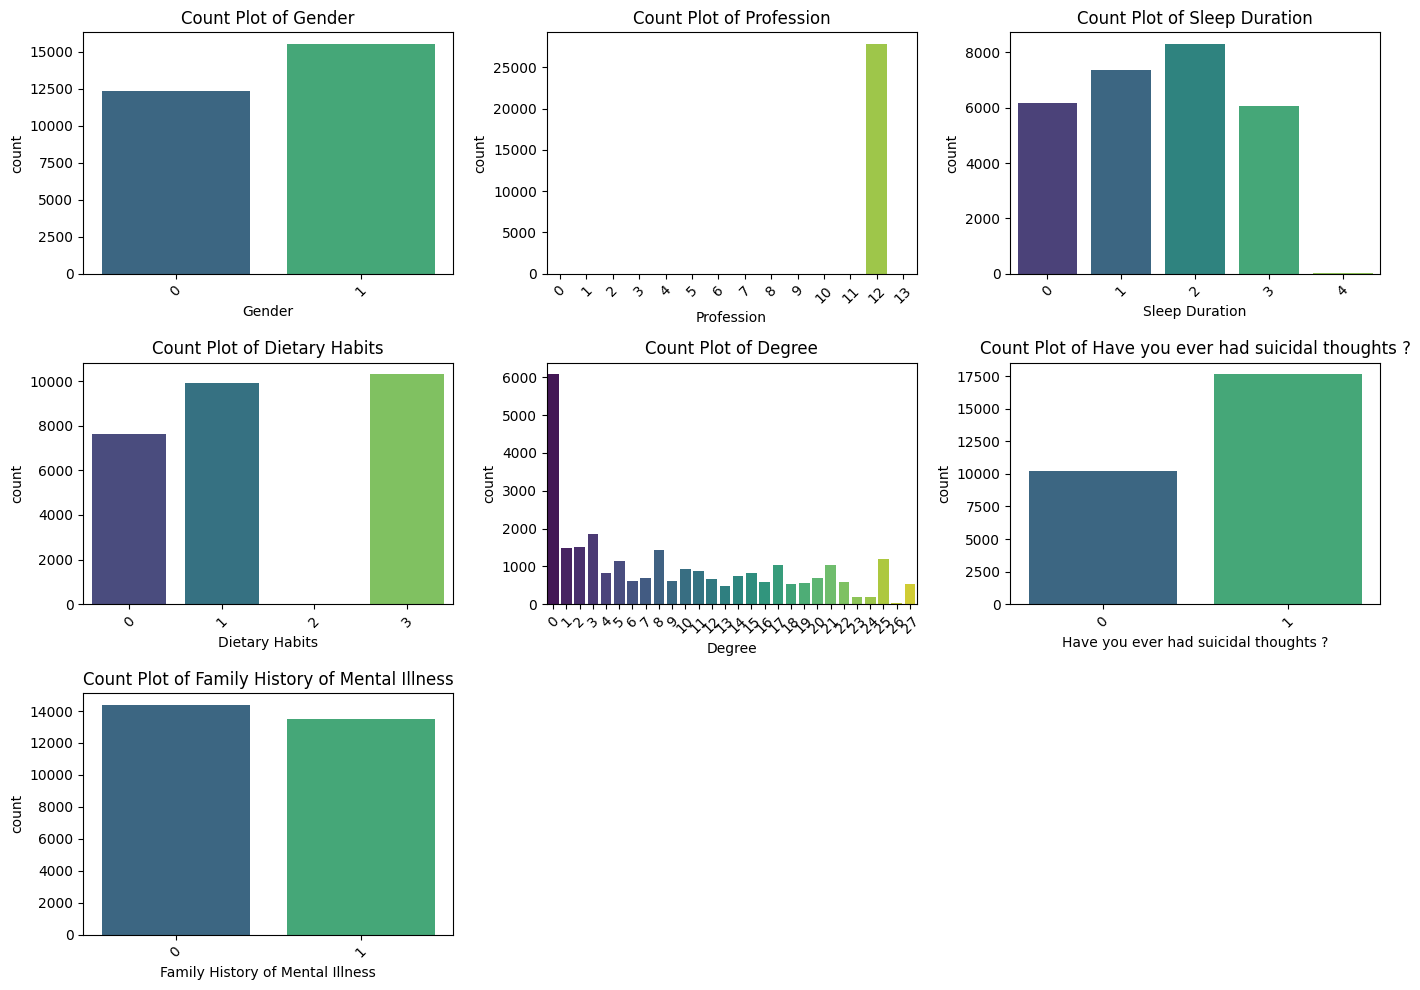

In [ ]:
# 4. Count Plots for Categorical Features
plt.figure(figsize=(14, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=data[col], palette="viridis")
    plt.title(f"Count Plot of {col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

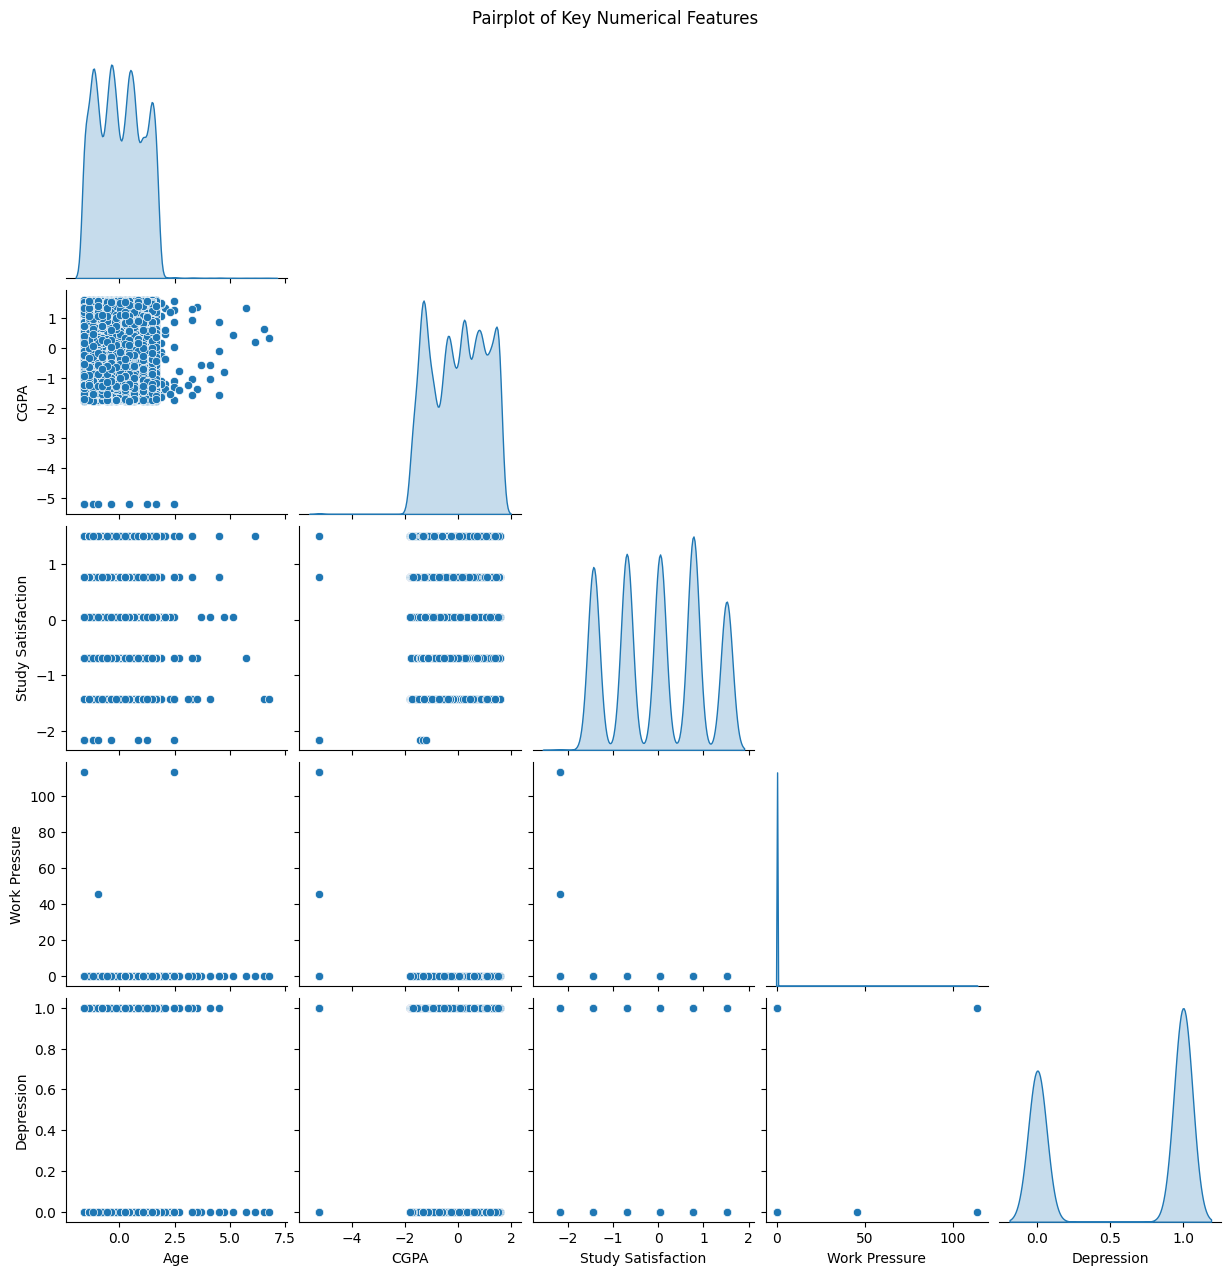

In [ ]:

# 5. Pairplot for Key Numerical Features
# Select a subset of numerical features for pairplot
pairplot_cols = ["Age", "CGPA", "Study Satisfaction", "Work Pressure", "Depression"]
sns.pairplot(data[pairplot_cols], diag_kind="kde", corner=True)
plt.suptitle("Pairplot of Key Numerical Features", y=1.02)
plt.show()

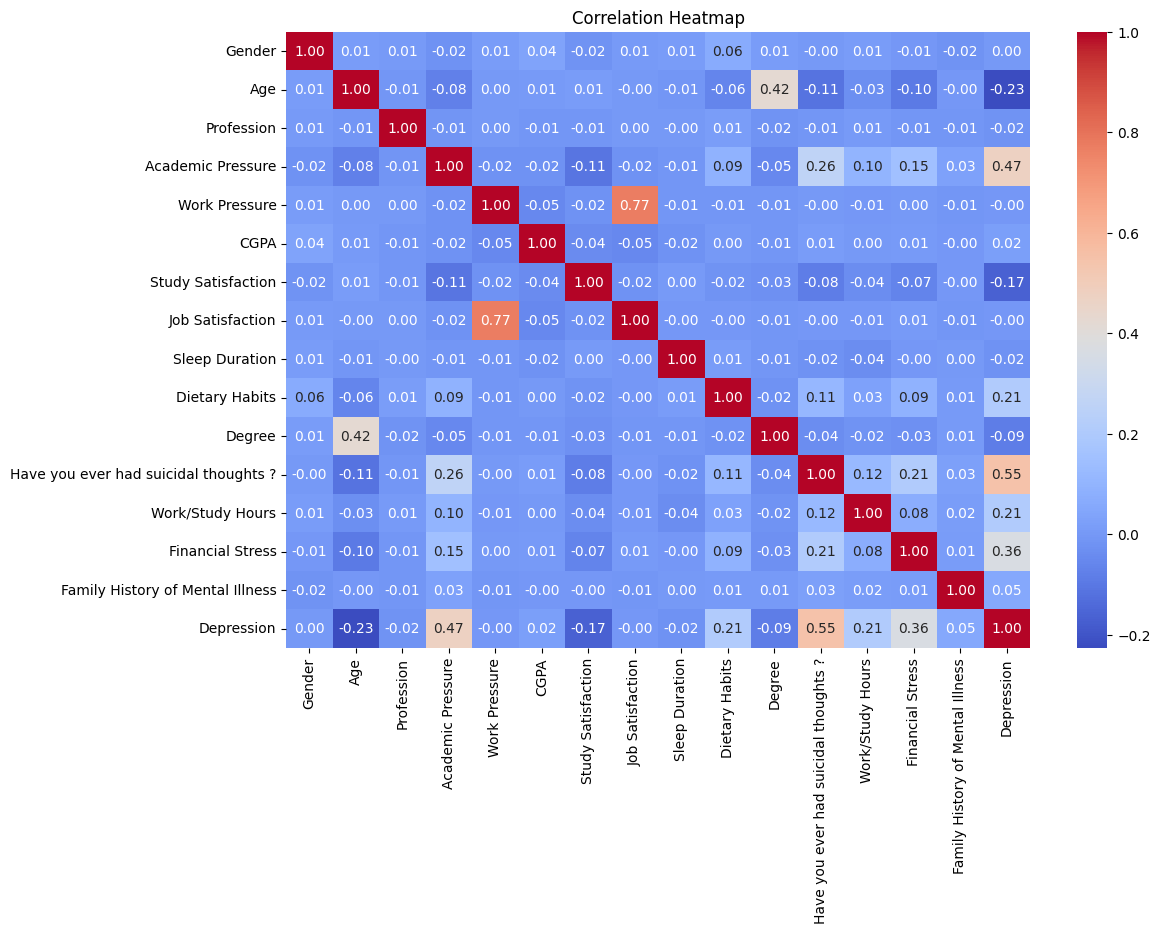

In [ ]:
# 6. Correlation Heatmap
plt.figure(figsize=(12, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


 Split into training and testing sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale all features (including categorical after encoding)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Train Linear Regression using Gradient Descent (SGDRegressor)

In [ ]:
# ============================================
# Train Linear Regression using Gradient Descent (SGDRegressor)
# ============================================
sgd_reg = SGDRegressor(random_state=42, max_iter=10000, tol=1e-3, eta0=0.001, penalty='l2', alpha=0.0001)

# Track loss curve
train_loss = []
test_loss = []
for epoch in range(1000):  # Train for 1000 epochs
    sgd_reg.partial_fit(X_train_scaled, y_train)  # Partial fit for each epoch
    y_train_pred = sgd_reg.predict(X_train_scaled)
    y_test_pred = sgd_reg.predict(X_test_scaled)
    train_loss.append(mean_squared_error(y_train, y_train_pred))
    test_loss.append(mean_squared_error(y_test, y_test_pred))


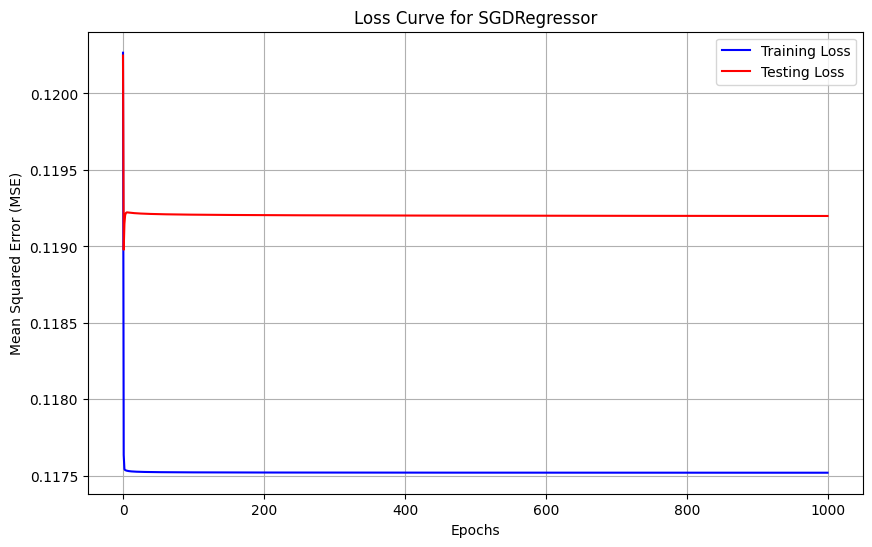

In [ ]:
# Plot the loss curve
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label="Training Loss", color="blue")
plt.plot(test_loss, label="Testing Loss", color="red")
plt.xlabel("Epochs")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Loss Curve for SGDRegressor")
plt.legend()
plt.grid()
plt.show()


In [ ]:
# Final predictions
y_pred_sgd = sgd_reg.predict(X_test_scaled)

Scatter Plot of the Final Linear Line

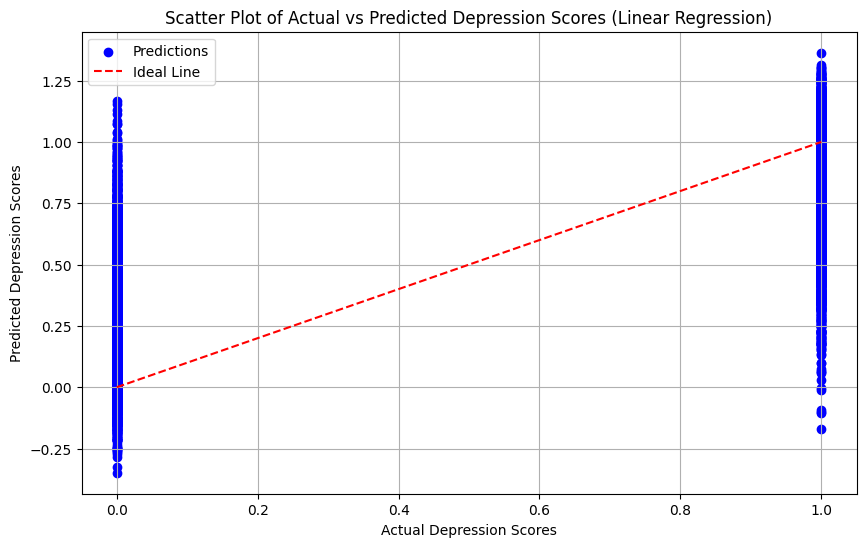

In [ ]:
# Scatter plot of the final linear line
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_sgd, color="blue", label="Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linestyle="--", label="Ideal Line")
plt.xlabel("Actual Depression Scores")
plt.ylabel("Predicted Depression Scores")
plt.title("Scatter Plot of Actual vs Predicted Depression Scores (Linear Regression)")
plt.legend()
plt.grid()
plt.show()

Train Decision Tree Regressor

In [ ]:
# ============================================
# Train Decision Tree Regressor
# ============================================
dt_reg = DecisionTreeRegressor(random_state=42, max_depth=5)
dt_reg.fit(X_train_scaled, y_train)
y_pred_dt = dt_reg.predict(X_test_scaled)

Train Random Forest Regressor

In [ ]:
# ============================================
# Train Random Forest Regressor
# ============================================
rf_reg = RandomForestRegressor(random_state=42, n_estimators=100, max_depth=10)
rf_reg.fit(X_train_scaled, y_train)
y_pred_rf = rf_reg.predict(X_test_scaled)


Evaluate models

In [ ]:
# ============================================
# Evaluate models
# ============================================
def evaluate_model(y_train_true, y_train_pred, y_test_true, y_test_pred, model_name):
    train_mse = mean_squared_error(y_train_true, y_train_pred)
    test_mse = mean_squared_error(y_test_true, y_test_pred)
    print(f"{model_name} Metrics:")
    print(f"Training MSE: {train_mse:.2f}, Testing MSE: {test_mse:.2f}")
    print(f"Difference (Train - Test): {abs(train_mse - test_mse):.2f}\n")

evaluate_model(y_train, sgd_reg.predict(X_train_scaled), y_test, y_pred_sgd, "Linear Regression (SGD)")
evaluate_model(y_train, dt_reg.predict(X_train_scaled), y_test, y_pred_dt, "Decision Tree Regressor")
evaluate_model(y_train, rf_reg.predict(X_train_scaled), y_test, y_pred_rf, "Random Forest Regressor")

Linear Regression (SGD) Metrics:
Training MSE: 0.12, Testing MSE: 0.12
Difference (Train - Test): 0.00

Decision Tree Regressor Metrics:
Training MSE: 0.12, Testing MSE: 0.13
Difference (Train - Test): 0.01

Random Forest Regressor Metrics:
Training MSE: 0.07, Testing MSE: 0.11
Difference (Train - Test): 0.04



Save the best model

In [ ]:
# ============================================
# Save the best model
# ============================================
best_model = None
best_mse = float('inf')

for model, y_pred, name in zip([sgd_reg, dt_reg, rf_reg], [y_pred_sgd, y_pred_dt, y_pred_rf],
                               ["Linear Regression (SGD)", "Decision Tree Regressor", "Random Forest Regressor"]):
    mse = mean_squared_error(y_test, y_pred)
    if mse < best_mse:
        best_mse = mse
        best_model = model

dump(best_model, "best_model.pkl")
print(f"Best Model Saved: {type(best_model).__name__} with MSE: {best_mse:.2f}")

Best Model Saved: RandomForestRegressor with MSE: 0.11


In [ ]:
from sklearn.impute import SimpleImputer

# Impute missing values with the mean
imputer = SimpleImputer(strategy="mean")
X_imputed = imputer.fit_transform(X)

# Initialize and fit the scaler
scaler = StandardScaler()
scaler.fit(X_imputed)  # Fit the scaler to the imputed data

# Save the scaler to a file
dump(scaler, "scaler.pkl")

print("Scaler saved as 'scaler.pkl'")

Scaler saved as 'scaler.pkl'


Create a prediction script

In [ ]:
# ============================================
# Create a prediction script
# ============================================
new_data = [[
    1,       # Gender (1 = Male, 0 = Female)
    25.0,    # Age
    12,      # Profession (Encoded value, e.g., 12 = Student)
    3.0,     # Academic Pressure (Numerical value, e.g., 3.0)
    0.0,     # Work Pressure (Numerical value, e.g., 0.0)
    8.97,    # CGPA (Numerical value, e.g., 8.97)
    2.0,     # Study Satisfaction (Numerical value, e.g., 2.0)
    0.0,     # Job Satisfaction (Numerical value, e.g., 0.0)
    0,       # Sleep Duration (Encoded value, e.g., 0 = '5-6 hours')
    0,       # Dietary Habits (Encoded value, e.g., 0 = Healthy)
    4,       # Degree (Encoded value, e.g., 4 = B.Pharm)
    1,       # Have you ever had suicidal thoughts? (1 = Yes, 0 = No)
    3.0,     # Work/Study Hours (Numerical value, e.g., 3.0)
    1.0,     # Financial Stress (Numerical value, e.g., 1.0)
    0        # Family History of Mental Illness (1 = Yes, 0 = No)
]]

# Convert input into a DataFrame
feature_names = X.columns.tolist()  # Exclude target variable
print("Input Feature Names:")
print(feature_names)

new_data_df = pd.DataFrame(new_data, columns=feature_names)

# Scale all features (including categorical after encoding)
new_data_scaled = scaler.transform(new_data_df)

# Make prediction
loaded_model = load("best_model.pkl")
prediction = loaded_model.predict(new_data_scaled)
print(f"Predicted Depression Score: {prediction[0]:.2f}")

Input Feature Names:
['Gender', 'Age', 'Profession', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Work/Study Hours', 'Financial Stress', 'Family History of Mental Illness']
Predicted Depression Score: 0.45


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
